<a href="https://colab.research.google.com/github/karmanandan/similar-images-model/blob/main/ImageSimilarity_Cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
from tqdm.auto import tqdm
import os
from matplotlib import pyplot as plt
%matplotlib inline
def return_image_embedding(model,img):
    # img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    curr_df = pd.DataFrame(preds[0]).T
    return curr_df
model = ResNet50(include_top=False, weights='imagenet', pooling='avg')

In [ ]:
# np.argmax(return_image_embedding(model,img_path))

In [ ]:
# return_image_embedding(model,img_path)[844]

In [ ]:
img_one_path = '/content/sample_data/Stranger-Things-Cinematography-Stranger-Things-Will-Sees-a-New-Threat.jpg'
img_two_path = '/content/sample_data/Screenshot-2022-08-17-at-19.jpeg'

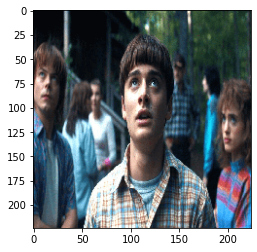

In [ ]:
img_1 = image.load_img(img_one_path, target_size=(224, 224))
plt.imshow(img_1)

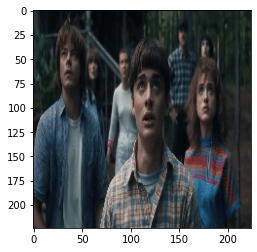

In [ ]:
img_2 = image.load_img(img_two_path, target_size=(224, 224))
plt.imshow(img_2)

In [ ]:
img1_embed = return_image_embedding(model,img_1)
img2_embed = return_image_embedding(model,img_2)

1/1 [==============================] - 0s 232ms/step


In [ ]:
img1_embed

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.646983,0.042518,0.0,2.135511,0.032257,0.025912,1.261139,1.037764,0.065074,0.437967,...,0.33796,0.063422,1.040604,1.312135,0.023639,0.304084,1.013919,0.0,0.254033,0.482296


In [ ]:
img2_embed

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.519619,0.266979,0.0,6.202257,0.681263,0.401505,0.139826,0.055888,0.375307,0.594579,...,0.081793,0.169694,0.44232,0.511678,0.403852,0.244506,0.604927,0.000923,0.360757,0.190529


1/1 [==============================] - 0s 230ms/step


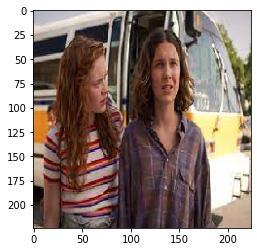

In [ ]:
test_img_path = '/content/sample_data/images.jpg'
img_3 = image.load_img(test_img_path, target_size=(224, 224))
plt.imshow(img_3)
img3_embed = return_image_embedding(model,img_3)

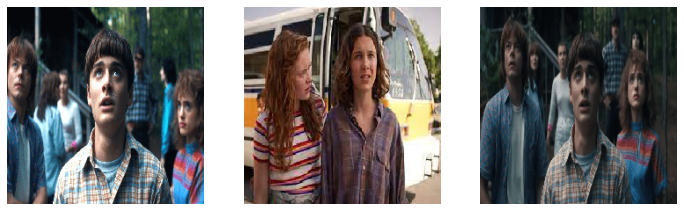

In [ ]:
_, axs = plt.subplots(1, 3, figsize=(12, 12))
axs = axs.flatten()
imgs = [img_1,img_3,img_2]
for img, ax in zip(imgs, axs):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity1 = cosine_similarity(img1_embed,img2_embed)
cosine_similarity1

array([[0.83048236]], dtype=float32)

In [ ]:
cosine_similarity2 = cosine_similarity(img2_embed,img3_embed)
cosine_similarity2

array([[0.6649491]], dtype=float32)

1/1 [==============================] - 0s 238ms/step


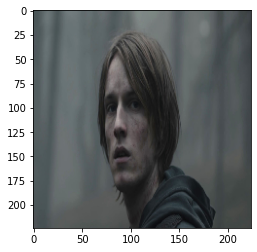

In [ ]:
test_img_path2 = '/content/sample_data/dark.jpg'
img_4 = image.load_img(test_img_path2, target_size=(224, 224))
plt.imshow(img_4)
img4_embed = return_image_embedding(model,img_4)

In [ ]:
cosine_similarity3 = cosine_similarity(img1_embed,img4_embed)
cosine_similarity3

array([[0.53863394]], dtype=float32)